Checking for Outliers

Transformations

Differencing

Seasonal Differencing

Standardization

In [60]:
NO_VISUALS = True

In [61]:
%run '02.05.25._13_Data_Aggregation_Cleaning.ipynb'


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Index(['Zeitstempel', 'kWh', 'kWh.1', 'kWh.2', 'kWh.3', 'kWh.4', 'kWh.5',
       'kWh.6', 'kWh.7', 'kWh.8', 'kWh.9', 'kWh.10', 'kWh.11', 'kWh.12',
       'kWh.13', 'kWh.14', 'kWh.15', 'kWh.16', 'kWh.17', 'kWh.18', 'kWh.19',
       'Euro/MWh', 'Euro/MWh.1', 'Euro/MWh.2', 'Euro/MWh.3', 'kWh.20',
       'kWh.21', 'kWh.22', 'kWh.23', 'kWh.24', 'kWh.25', 'kWh.26', 'kWh.27',
       'kWh.28', 'kWh.29', 'kWh.30', 'kWh.31', 'kWh.32', 'kWh.33', 'kWh.34',
       'kWh.35', 'kWh.36', 'kWh.37', 'kWh.38', 'kWh.39', 'kWh.40', 'kWh.41',
       'kWh.42', 'kWh.43', 'kWh.44', 'kWh.45', 'kWh.46', 'kWh.47', 'kWh.48',
       'kWh.49', 'kWh.50', 'kWh.51', 'kWh.52', 'kWh.53', 'kWh.54', 'kWh.55',
       'kWh.56', 'kWh.57', 'kWh.58', 'kWh.59'],
      dtype='object')
301


# III: Time Series Analysis 

In [46]:
NO_VISUALS = False

**III. 1.Determening Outliers**

The last element of the time series is an outlier, it's an incomplete sum

In [47]:
df = df[:-1]

We then recompute our time_series

In [48]:
energy_consumption_data = df['Total Energy Consumption (kWh)'].dropna().values

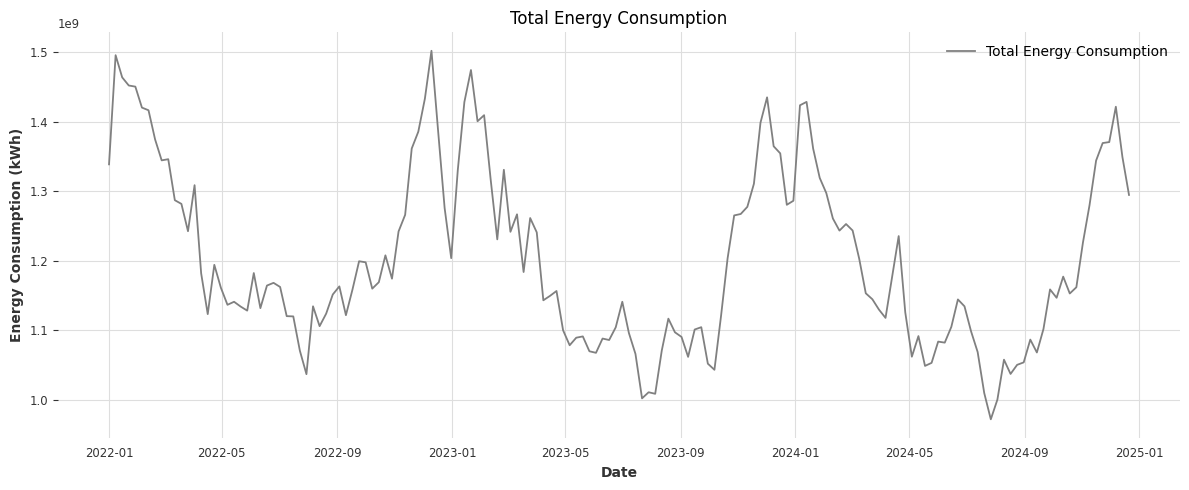

In [49]:
if not globals().get("NO_VISUALS", False):
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.plot(df['Total Energy Consumption (kWh)'], label='Total Energy Consumption', color='gray')
    ax.set_title('Total Energy Consumption')
    ax.set_xlabel('Date')
    ax.set_ylabel('Energy Consumption (kWh)')
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

**III. 1. Stationarity of my Time Series**

Formal checks will be added in next chapters

To-do: forecast par semaine, dépend de swissgrid, 

Ecrire chaque concept dans le rapport

graph de xt+i - xt

**III. 1.a. Informal check**

# III. 1.a. i. Mean Calculation

Calculating the mean of my time series (Total Power Consumption in the Grid)

the formula for the mean is: μ = (x₁ + x₂ + ... + xₙ) / n

In [16]:
def mean(data):
    return sum(data) / len(data)

In [17]:
print(mean(energy_consumption_data))

1202968119.3566718


In [18]:
def sliced_mean_calculator(data, time_index,variance_window_size):
    means = []
    time_indices = []
    
    for i in range(0, len(data) - variance_window_size + 1, variance_window_size):  
        window_slice = data[i:i + variance_window_size]
        var = mean(window_slice)
        means.append(var)
        time_indices.append(time_index[i + variance_window_size - 1])
    return means, time_indices

In [19]:
mean_window_size = len(energy_consumption_data) // 10

In [20]:
means, time_indices = sliced_mean_calculator(energy_consumption_data,time_index, mean_window_size)

Plotting Mean over time

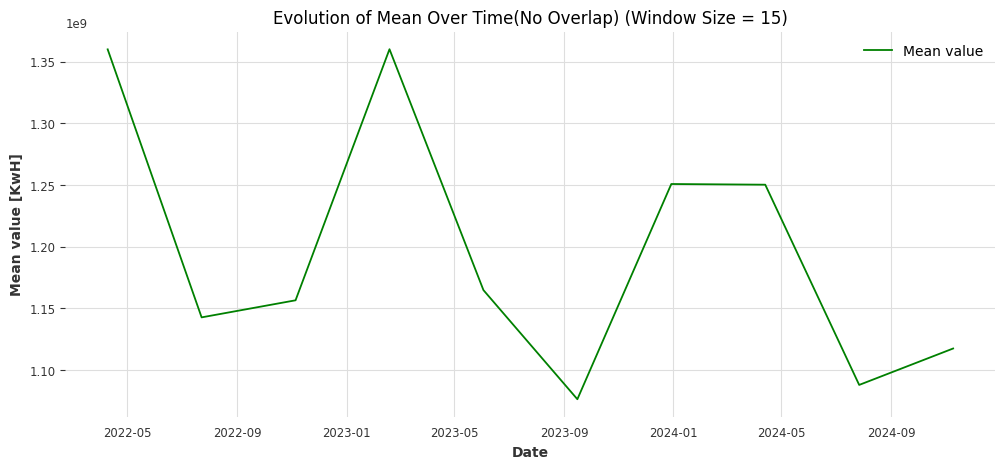

In [50]:
if not globals().get("NO_VISUALS", False):
    plt.figure(figsize=(12, 5))
    plt.plot(time_indices, means, color='green', label='Mean value')
    plt.xlabel('Date')
    plt.ylabel('Mean value [KwH]')
    plt.title(f'Evolution of Mean Over Time(No Overlap) (Window Size = {mean_window_size})')
    plt.grid(True)
    plt.legend()
    plt.show()

# III. 1.a. ii. Variance Calculation

Calculating Variance:

Variance = 1/n sum(xi- mean)**2

In [22]:
def variance(data):
    mean_value = mean(data)
    variance = sum((x - mean_value)**2 for x in data) / len(data)
    return variance

In [23]:
print(variance(energy_consumption_data))

1.6002960210605798e+16


Plotting variance over time

In [24]:
total_length =  len(energy_consumption_data)
variance_window_size = total_length // 10

In [25]:
print(variance_window_size)

15


Defining variance, time arrays

In [26]:
def sliced_variances_calculator(data, time_index,variance_window_size):
    variances = []
    time_indices = []
    
    for i in range(0, len(data) - variance_window_size + 1, variance_window_size):  
        window_slice = data[i:i + variance_window_size]
        var = variance(window_slice)
        variances.append(var)
        time_indices.append(time_index[i + variance_window_size - 1]) 
    return variances, time_indices


In [27]:
variances, time_indices = sliced_variances_calculator(energy_consumption_data,time_index, variance_window_size)

In [28]:
print(variances, time_indices)

[7530043982607567.0, 869134329872836.5, 2237846043815563.0, 7214528226143497.0, 6735329514494805.0, 1540431538146303.8, 1.3936833874959886e+16, 9413444828588520.0, 3478862917688383.5, 5546789777234061.0] [Timestamp('2022-04-09 00:00:00'), Timestamp('2022-07-23 00:00:00'), Timestamp('2022-11-05 00:00:00'), Timestamp('2023-02-18 00:00:00'), Timestamp('2023-06-03 00:00:00'), Timestamp('2023-09-16 00:00:00'), Timestamp('2023-12-30 00:00:00'), Timestamp('2024-04-13 00:00:00'), Timestamp('2024-07-27 00:00:00'), Timestamp('2024-11-09 00:00:00')]


Plotting Variance over time

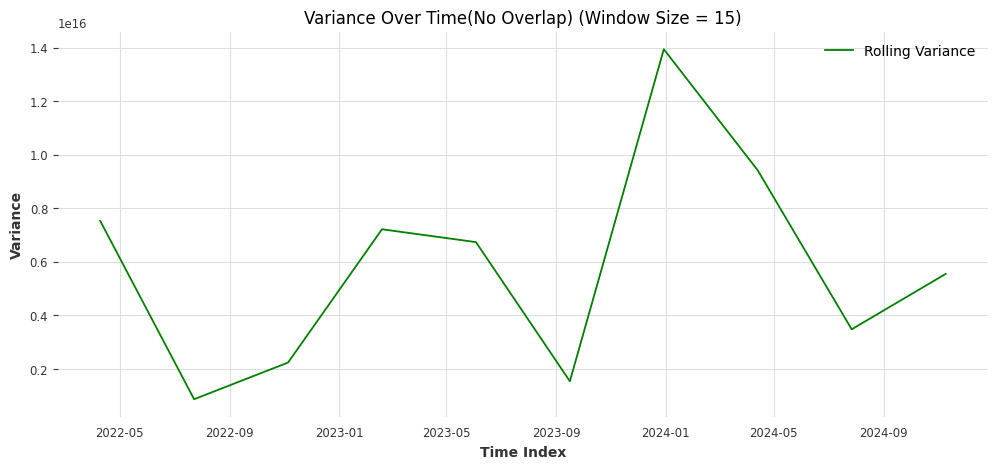

In [51]:
if not globals().get("NO_VISUALS", False):
    plt.figure(figsize=(12, 5))
    plt.plot(time_indices, variances, color='green', label='Rolling Variance')
    plt.xlabel('Time Index')
    plt.ylabel('Variance')
    plt.title(f'Variance Over Time(No Overlap) (Window Size = {variance_window_size})')
    plt.grid(True)
    plt.legend()
    plt.show()

**III. 1.a. iii. Autocorrelation Calculation**

In [30]:
from statsmodels.tsa.stattools import acf

autocorrelation function (ACF) at lag k, for k ≥ 0, of the time series is defined by
ro k = ck/ c0 where ck is the autocovariance at lag k

In [31]:
alpha = 0.05
confint = 1 - alpha
nlags = 52

In [32]:
import numpy as np

In [33]:
def check_autocorrelation(data, nlags=10, alpha=0.05):
    data = np.asarray(data)
    acf_vals, _ = acf(data, nlags=nlags, alpha=alpha) 
    return acf_vals


In [34]:
acf_vals = check_autocorrelation(energy_consumption_data, nlags=nlags)

In [52]:
if not globals().get("NO_VISUALS", False):
    print(f"High Autocorrelation defined as {1 - alpha}")
    for lag in range(1, nlags + 1):
        print(f"lag {lag:2d} → ACF = {acf_vals[lag]: .4f}")

High Autocorrelation defined as 0.95
lag  1 → ACF =  0.9135
lag  2 → ACF =  0.8071
lag  3 → ACF =  0.7151
lag  4 → ACF =  0.6361
lag  5 → ACF =  0.5706
lag  6 → ACF =  0.5107
lag  7 → ACF =  0.4504
lag  8 → ACF =  0.3639
lag  9 → ACF =  0.2841
lag 10 → ACF =  0.2034
lag 11 → ACF =  0.1235
lag 12 → ACF =  0.0247
lag 13 → ACF = -0.0667
lag 14 → ACF = -0.1463
lag 15 → ACF = -0.2002
lag 16 → ACF = -0.2672
lag 17 → ACF = -0.3300
lag 18 → ACF = -0.3616
lag 19 → ACF = -0.3994
lag 20 → ACF = -0.4106
lag 21 → ACF = -0.4233
lag 22 → ACF = -0.4349
lag 23 → ACF = -0.4641
lag 24 → ACF = -0.5007
lag 25 → ACF = -0.5339
lag 26 → ACF = -0.5627
lag 27 → ACF = -0.5675
lag 28 → ACF = -0.5496
lag 29 → ACF = -0.4986
lag 30 → ACF = -0.4523
lag 31 → ACF = -0.4206
lag 32 → ACF = -0.4001
lag 33 → ACF = -0.3595
lag 34 → ACF = -0.3231
lag 35 → ACF = -0.2766
lag 36 → ACF = -0.2151
lag 37 → ACF = -0.1509
lag 38 → ACF = -0.0782
lag 39 → ACF = -0.0068
lag 40 → ACF =  0.0925
lag 41 → ACF =  0.1765
lag 42 → ACF =  0.24

Setting axis at 0

There’s no point in computing the correlogram for a visibly non-stationary series—consider only
the stationary portion of the temperature data in the next plot. (Boris). I will then difference my TS then apply ACF.

In [36]:
from darts import TimeSeries

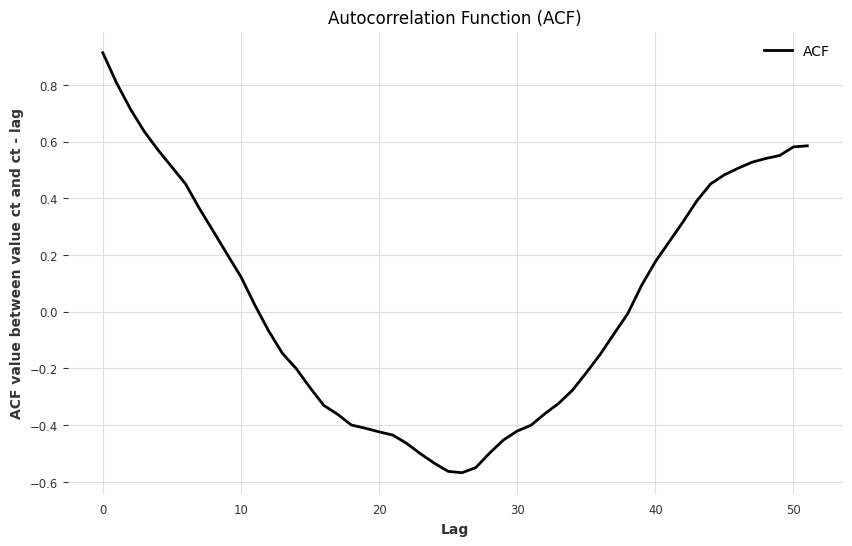

In [53]:
acf_series = TimeSeries.from_values(acf_vals[1:])
if not globals().get("NO_VISUALS", False):
    plt.figure(figsize=(10, 6))
    acf_series.plot(label="ACF")
    plt.title("Autocorrelation Function (ACF)")
    plt.xlabel("Lag")
    plt.ylabel("ACF value between value ct and ct - lag")
    plt.legend(loc="upper right")
    plt.show()

PACF: I calculated PACF starting from the ACF Function

After calculating the autocovariance vector, I'm going to use Yule-Walker Modified Method to calculate the PACF vector

This is given by the formula R . ϕ = r where R is the Yule-Walker matrix , r is the ACF vector, ϕ is the PACF vector we're looking for

In [38]:
from scipy.linalg import toeplitz

In [39]:
def pacf_yule_walker_full(gamma: np.ndarray, nlags: int):
    pacf_vals = []
    for k in range(1, nlags + 1):
        R = toeplitz(gamma[:k])          
        r = gamma[1:k+1]                 # r_k: γ(1) to γ(k)
        phi = solve(R, r)                # Solving for R * phi = r
        pacf_vals.append(phi[-1])      
    return np.array(pacf_vals)
from numpy.linalg import solve

In [40]:
pacf_phi_vector = pacf_yule_walker_full(acf_vals, nlags=nlags)

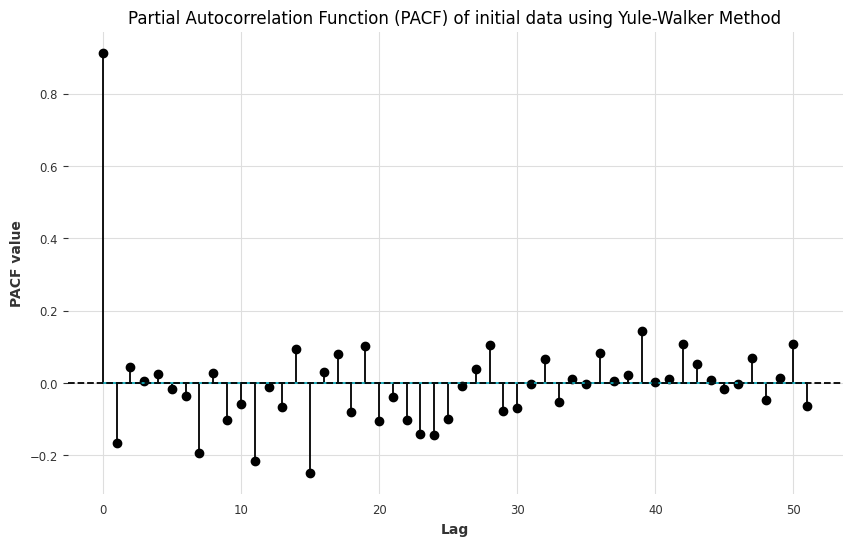

In [54]:
lags = np.arange(len(pacf_phi_vector))  
pacf_vals = pacf_phi_vector
if not globals().get("NO_VISUALS", False):
    plt.figure(figsize=(10, 6))
    plt.stem(lags, pacf_vals)
    plt.axhline(0, color='black', linestyle='--')
    plt.title("Partial Autocorrelation Function (PACF) of initial data using Yule-Walker Method")
    plt.xlabel("Lag")
    plt.ylabel("PACF value")
    plt.grid(True)
    plt.show()


In [42]:
from darts.utils.statistics import (
    remove_trend,
    plot_acf,
    plot_pacf,
)

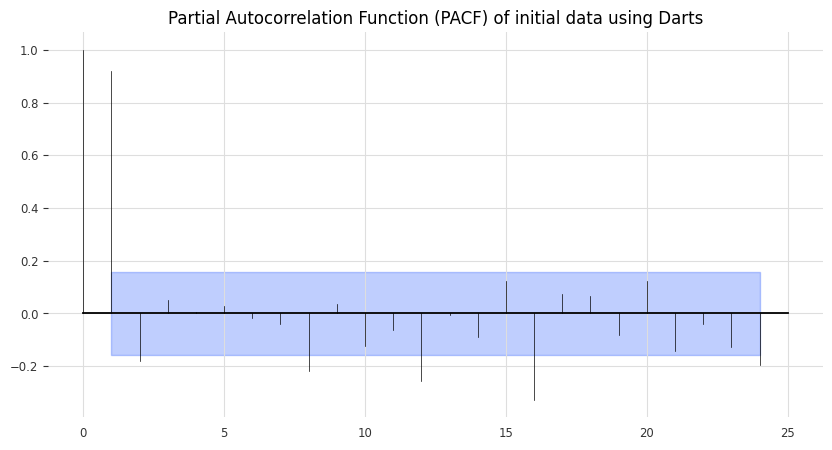

In [55]:
if not globals().get("NO_VISUALS", False):
    plot_pacf(TimeSeries.from_values(energy_consumption_data))
    plt.title("Partial Autocorrelation Function (PACF) of initial data using Darts")  